## K-Means

K-Means is a very simple clustering algorithm (clustering belongs to unsupervised learning). Given a fixed number of clusters and an input dataset the algorithm tries to partition the data into clusters such that the clusters have high intra-class similarity and low inter-class similarity. 

### Algorithm

1. Initialize the cluster centers, either randomly within the range of the input data or (recommended) with some of the existing training examples

2. Until convergence  

   2.1. Assign each datapoint to the closest cluster. The distance between a point and cluster center is measured using the Euclidean distance.  

   2.2. Update the current estimates of the cluster centers by setting them to the mean of all instance belonging to that cluster  
   
   
### Objective function

The underlying objective function tries to find cluster centers such that, if the data are partitioned into the corresponding clusters, distances between data points and their closest cluster centers become as small as possible.

Given a set of datapoints ${x_1, ..., x_n}$ and a positive number $k$, find the clusters $C_1, ..., C_k$ that minimize

\begin{equation}
J = \sum_{i=1}^n \, \sum_{j=1}^k \, z_{ij} \, || x_i - \mu_j ||_2
\end{equation}

where:  
- $z_{ij} \in \{0,1\}$ defines whether of not datapoint $x_i$ belongs to cluster $C_j$
- $\mu_j$ denotes the cluster center of cluster $C_j$
- $|| \, ||_2$ denotes the Euclidean distance

### Disadvantages of K-Means
- The number of clusters has to be set in the beginning
- The results depend on the inital cluster centers
- It's sensitive to outliers
- It's not suitable for finding non-convex clusters
- It's not guaranteed to find a global optimum, so it can get stuck in a local minimum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
np.random.seed(123)
%matplotlib inline

Shape of dataset: (1000, 2)


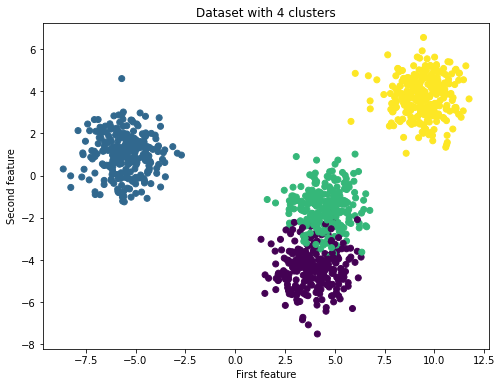

In [2]:
X, y = make_blobs(centers=4, n_samples=1000)
print(f'Shape of dataset: {X.shape}')

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
class KMeans():
    def __init__(self, n_clusters=4):
        self.k = n_clusters

    def fit(self, data):
        """
        Fits the k-means model to the given dataset
        """
        n_samples, _ = data.shape
        # initialize cluster centers
        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)

        # We will keep track of whether the assignment of data points
        # to the clusters has changed. If it stops changing, we are 
        # done fitting the model
        old_assigns = None
        n_iters = 0

        while True:
            new_assigns = [self.classify(datapoint) for datapoint in data]

            if new_assigns == old_assigns:
                print(f"Training finished after {n_iters} iterations!")
                return

            old_assigns = new_assigns
            n_iters += 1

            # recalculate centers
            for id_ in range(self.k):
                points_idx = np.where(np.array(new_assigns) == id_)
                datapoints = data[points_idx]
                self.centers[id_] = datapoints.mean(axis=0)

    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists

    def classify(self, datapoint):
        """
        Given a datapoint, compute the cluster closest to the
        datapoint. Return the cluster ID of that cluster.
        """
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)

    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k')
        plt.show()

In [13]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(X)

Training finished after 7 iterations!


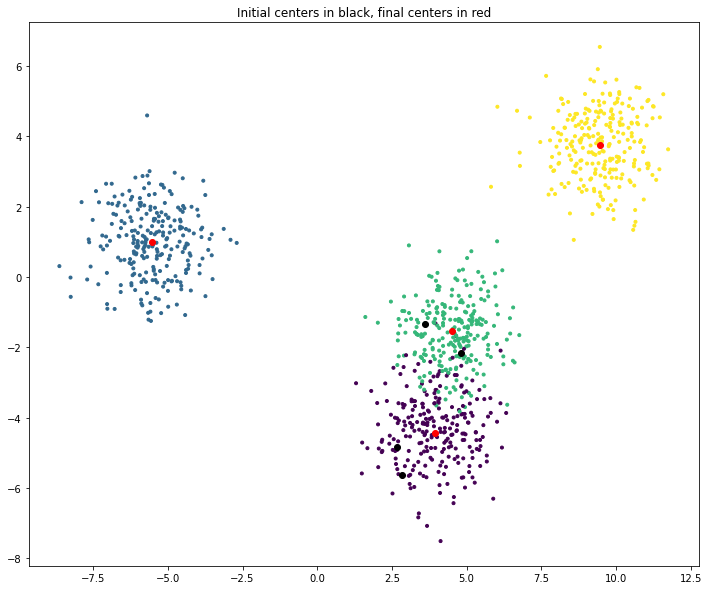

In [14]:
kmeans.plot_clusters(X)